In [ ]:

class RectangleRegion:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    
    def computeFeature(self, ii):
        return ii[self.y+self.height][self.x+self.width] + ii[self.y][self.x] - (ii[self.y+self.height][self.x]+ii[self.y][self.x+self.width])

    def __str__(self):
        return "(x= %d, y= %d, width= %d, height= %d)" % (self.x, self.y, self.width, self.height)
    def __repr__(self):
        return "RectangleRegion(%d, %d, %d, %d)" % (self.x, self.y, self.width, self.height)

class HaarFeature:
    def __init__(self, posRegions, negRegions):
        self.posRegions = posRegions
        self.negRegions = negRegions
        
    def computeFeature(self, ii):
        return sum([pos.computeFeature(ii) for pos in self.posRegions]) - sum([neg.computeFeature(ii) for neg in self.negRegions])
    
    def __str__(self):
        return "Haar feature (positive regions=%s, negative regions=%s)" % (str(self.posRegions), str(self.negRegions))

In [ ]:
def buildFeatures( imageShape):
  """
  Builds the possible features given an image shape.
    Parameters:
      imageShape: A tuple of form (height, width).
    Returns:
      A numpy array of HaarFeature class.
  """
  height, width = imageShape
  features = []
  for w in range(1, width+1):
    for h in range(1, height+1):
      i = 0
      while i + w < width:
        j = 0
        while j + h < height:
          #2 rectangle features
          immediate = RectangleRegion(i, j, w, h)
          right = RectangleRegion(i+w, j, w, h)
          if i + 2 * w < width: #Horizontally Adjacent
            features.append(HaarFeature([right], [immediate]))

          bottom = RectangleRegion(i, j+h, w, h)
          if j + 2 * h < height: #Vertically Adjacent
            features.append(HaarFeature([immediate], [bottom]))
          
          right_2 = RectangleRegion(i+2*w, j, w, h)
          #3 rectangle features
          if i + 3 * w < width: #Horizontally Adjacent
            features.append(HaarFeature([right], [right_2, immediate]))

          bottom_2 = RectangleRegion(i, j+2*h, w, h)
          if j + 3 * h < height: #Vertically Adjacent
            features.append(HaarFeature([bottom], [bottom_2, immediate]))

          #4 rectangle features
          bottom_right = RectangleRegion(i+w, j+h, w, h)
          if i + 2 * w < width and j + 2 * h < height:
            features.append(HaarFeature([right, bottom], [immediate, bottom_right]))

          j += 1
        i += 1
  return np.array(features)
    
def applyFeatures( features, iis):
    """
    Maps features onto the training dataset.
      Parameters:
        features: A numpy array of HaarFeature class.
        iis: A list of numpy array with shape (m, n) representing the integral images.
      Returns:
        featureVals: A numpy array of shape (len(features), len(dataset)).
          Each row represents the values of a single feature for each training sample.
    """
    featureVals = np.zeros((len(features), len(iis)))
    for j in range(len(features)):
        for i in range(len(iis)):
            featureVals[j, i] = features[j].computeFeature(iis[i])
    return featureVals

In [ ]:
# for google colab
from google.colab import drive
# mount your Google Drive
drive.mount('/content/gdrive')
!pip install utils
!pip install cv
import cv2
import utils
import matplotlib.pyplot as plt


Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/')
!pwd

/content/gdrive/MyDrive


In [ ]:
print('Loading images')
path = '/content/gdrive/MyDrive/train'
path2 = '/content/gdrive/MyDrive/test'
X_train = []
y_train = []
X_test = []
y_test = []
for filename in os.listdir(path):
  if filename.find('cardboard') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(1)
  if filename.find('glass') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(2)
  if filename.find('metal') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(3)
  if filename.find('paper') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(4)
  if filename.find('plastic') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(5)
  if filename.find('trash') != -1:
    img = cv2.imread(os.path.join(path,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_train.append(img1)
      y_train.append(6)  
for filename in os.listdir(path2):
  if filename.find('cardboard') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(1)
  if filename.find('glass') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(2)
  if filename.find('metal') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(3)
  if filename.find('paper') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(4)
  if filename.find('plastic') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(5)
  if filename.find('trash') != -1:
    img = cv2.imread(os.path.join(path2,filename),0)
    img1 = cv2.resize(img, (36, 16), interpolation=cv2. INTER_AREA)
    if img1 is not None:
      X_test.append(img1)
      y_test.append(6) 
print(len(X_train))

Loading images
750


In [ ]:
import numpy as np
from copy import deepcopy


class AdaBoostClassifier(object):

    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''AdaBoostClassifier can only be called with keyword
                   arguments for the following keywords: base_estimator ,n_estimators,
                    learning_rate,algorithm,random_state''')
        allowed_keys = ['base_estimator', 'n_estimators', 'learning_rate', 'algorithm', 'random_state']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")

        n_estimators = 50
        learning_rate = 1
        algorithm = 'SAMME.R'
        random_state = None

        if kwargs and not args:
            if 'base_estimator' in kwargs:
                base_estimator = kwargs.pop('base_estimator')
            else:
                raise ValueError('''base_estimator can not be None''')
            if 'n_estimators' in kwargs: n_estimators = kwargs.pop('n_estimators')
            if 'learning_rate' in kwargs: learning_rate = kwargs.pop('learning_rate')
            if 'algorithm' in kwargs: algorithm = kwargs.pop('algorithm')
            if 'random_state' in kwargs: random_state = kwargs.pop('random_state')

        self.base_estimator_ = base_estimator
        self.n_estimators_ = n_estimators
        self.learning_rate_ = learning_rate
        self.algorithm_ = algorithm
        self.random_state_ = random_state
        self.estimators_ = list()
        self.estimator_weights_ = np.zeros(self.n_estimators_)
        self.estimator_errors_ = np.ones(self.n_estimators_)


    def _samme_proba(self, estimator, n_classes, X):
        """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].
        References
        ----------
        .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.
        """
        proba = estimator.predict_proba(X)

        # Displace zero probabilities so the log is defined.
        # Also fix negative elements which may occur with
        # negative sample weights.
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
        log_proba = np.log(proba)

        return (n_classes - 1) * (log_proba - (1. / n_classes)
                                  * log_proba.sum(axis=1)[:, np.newaxis])


    def fit(self, X, y):
        self.n_samples = X.shape[0]
        # There is hidden trouble for classes, here the classes will be sorted.
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        for iboost in range(self.n_estimators_):
            if iboost == 0:
                sample_weight = np.ones(self.n_samples) / self.n_samples

            sample_weight, estimator_weight, estimator_error = self.boost(X, y, sample_weight)

            # early stop
            if estimator_error == None:
                break

            # append error and weight
            self.estimator_errors_[iboost] = estimator_error
            self.estimator_weights_[iboost] = estimator_weight

            if estimator_error <= 0:
                break

        return self


    def boost(self, X, y, sample_weight):
        if self.algorithm_ == 'SAMME':
            return self.discrete_boost(X, y, sample_weight)
        elif self.algorithm_ == 'SAMME.R':
            return self.real_boost(X, y, sample_weight)

    def real_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1.0 - 1 / self.n_classes_:
            return None, None, None

        y_predict_proba = estimator.predict_proba(X)
        # repalce zero
        y_predict_proba[y_predict_proba < np.finfo(y_predict_proba.dtype).eps] = np.finfo(y_predict_proba.dtype).eps

        y_codes = np.array([-1. / (self.n_classes_ - 1), 1.])
        y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])

        # for sample weight update
        intermediate_variable = (-1. * self.learning_rate_ * (((self.n_classes_ - 1) / self.n_classes_) *
                                                              inner1d(y_coding, np.log(
                                                                  y_predict_proba))))  #dot iterate for each row

        # update sample weight
        sample_weight *= np.exp(intermediate_variable)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, 1, estimator_error


    def discrete_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1 - 1 / self.n_classes_:
            return None, None, None

        # update estimator_weight
        estimator_weight = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)

        if estimator_weight <= 0:
            return None, None, None

        # update sample weight
        sample_weight *= np.exp(estimator_weight * incorrect)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, estimator_weight, estimator_error

    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(self._samme_proba(estimator, n_classes, X) for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)


    def predict_proba(self, X):
        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(self._samme_proba(estimator, self.n_classes_, X)
                        for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

In [ ]:
from math import log
import collections
import numpy as np


class DecisionTree(object):
    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''DecisionTree can only be called with keyword
                   arguments for the following keywords: training_datafile,
                     max_depth_desired, min_sample_split,min_leaf,criterion''')
        allowed_keys = ['training_datafile', 'criterion', 'max_depth_desired', 'min_sample_split', 'min_leaf']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")
        training_datafile = criterion = max_depth_desired = min_sample_split = None

        if kwargs and not args:
            if 'training_datafile' in kwargs: training_datafile = kwargs.pop('training_datafile')
            if 'criterion' in kwargs: criterion = kwargs.pop('criterion')
            if 'min_sample_split' in kwargs: min_sample_split = kwargs.pop('min_sample_split')
            if 'max_depth_desired' in kwargs: max_depth_desired = kwargs.pop('max_depth_desired')
            if 'min_leaf' in kwargs: min_leaf = kwargs.pop('min_leaf')

        if not args and training_datafile:
            self._training_datafile = training_datafile
        if max_depth_desired:
            self._max_depth_desired = max_depth_desired
        else:
            self._max_depth_desired = 10
        if min_sample_split:
            self._min_sample_split = min_sample_split
        else:
            self._min_sample_split = 0
        if criterion:
            self._criterion = criterion
        else:
            self._criterion = 'Gini'
        if min_leaf:
            self._min_leaf = min_leaf
        else:
            self._min_leaf = 0
            self._prune=False

    # def readDataSet(self):。


    def startCreateTree(self):
        return self.createTree(self._dataSet, self._labels, 0)

    def calcShannonEnt(self, dataSet):
        numEntries = len(dataSet)
        labelCounts = {}
        for featVec in dataSet:  # the the number of unique elements and their occurance
            currentLabel = featVec[-1]
            if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
            labelCounts[currentLabel] += 1
        shannonEnt = 0.0
        for key in labelCounts:
            prob = float(labelCounts[key]) / numEntries
            shannonEnt -= prob * log(prob, 2)  # log base 2
        return shannonEnt

    def calcGiniIndex(self, dataSet):
        numEntries = len(dataSet)
        labelCounts = {}
        for featVec in dataSet:  # the the number of unique elements and their occurance
            currentLabel = featVec[-1]
            if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
            labelCounts[currentLabel] += 1
        giniIndex = 1
        for key in labelCounts:
            prob = float(labelCounts[key]) / numEntries
            giniIndex -= prob * prob  # gini index
        return giniIndex


    def splitDataSet(self, dataSet, axis, value):
        retDataSet = []
        for featVec in dataSet:
            if featVec[axis] == value:
                reducedFeatVec = featVec[:axis]  # chop out axis used for splitting
                reducedFeatVec.extend(featVec[axis + 1:])
                retDataSet.append(reducedFeatVec)
        return retDataSet

    def chooseBestFeatureToSplit(self,dataSet):  # list of lists,and the last element of list is the class label
        if self._criterion == 'entropy':
            numFeatures = len(dataSet[0]) - 1
            baseEntropy = self.calcShannonEnt(dataSet)
            bestInfoGain = 0
            bestFeature = -1
            for i in range(numFeatures):  # iterate over all the features
                featList = [example[i] for example in dataSet]  #create a list of all the examples of this feature
                uniqueVals = set(featList)  #get a set of unique values
                newEntropy = 0.0
                for value in uniqueVals:
                    subDataSet = self.splitDataSet(dataSet, i, value)
                    if len(subDataSet) < self._min_leaf:  #if the subdataset less than 30,cannot be a leaf node
                        break
                    prob = len(subDataSet) / float(len(dataSet))
                    newEntropy += prob * self.calcShannonEnt(subDataSet)
                infoGain = baseEntropy - newEntropy  #calculate the info gain; ie reduction in entropy
                if (infoGain > bestInfoGain):  #compare this to the best gain so far
                    bestInfoGain = infoGain  #if better than current best, set to best
                    bestFeature = i
            return bestFeature  # returns an integer
        elif self._criterion == 'Gini':
            numFeatures = len(dataSet[0]) - 1
            bestImpurity = 10
            bestFeature = -1
            for i in range(numFeatures):  # iterate over all the features
                featList = [example[i] for example in dataSet]  #create a list of all the examples of this feature
                uniqueVals = set(featList)  #get a set of unique values
                newEntropy = 0.0
                for value in uniqueVals:
                    subDataSet = self.splitDataSet(dataSet, i, value)
                    if len(subDataSet) < self._min_leaf:
                        newEntropy=10  #which means this feature can not be used as the requirement of minleaf
                        break
                    prob = len(subDataSet) / float(len(dataSet))
                    newEntropy += prob * self.calcGiniIndex(subDataSet)
                if (bestImpurity > newEntropy):  #compare this to the  so far
                    bestImpurity = newEntropy  #if better than current best, set to best
                    bestFeature = i
            print(bestImpurity)
            return bestFeature  # returns an integer

    def distrCnt(self, classList):  # return the distribution
        classCount = collections.Counter(classList)
        totalNum = len(classList)
        ans = sorted(classCount.keys(), key=lambda d: classCount[d], reverse=True)[0]
        return ans + ':' + str(round(classCount[ans] / totalNum, 3))


    def majority(self,classList): #return the major class's probability
        classCount = collections.Counter(classList)
        totalNum = len(classList)
        ans = sorted(classCount.keys(), key=lambda d: classCount[d], reverse=True)[0]
        return ans,round(classCount[ans] / totalNum, 3)

    def createTree(self, dataSet, labels, depth):
        maxDepth = self._max_depth_desired
        minSplit = self._min_sample_split
        classList = [example[-1] for example in dataSet]
        if depth >= maxDepth:
            return self.distrCnt(classList)
        if classList.count(classList[0]) == len(classList):
            return self.distrCnt(classList)  # stop splitting when all of the classes are equal
        if len(dataSet[0]) == 1:  # stop splitting when there are no more features in dataSet
            return self.distrCnt(classList)
        if len(classList) <= minSplit:  # stop splitting when there are less than min_sample_split samples
            return self.distrCnt(classList)
        bestFeat = self.chooseBestFeatureToSplit(dataSet)  # feature index
        if bestFeat == -1:  # stop splitting when the leaf nodes have less than min_leaf samples
            return self.distrCnt(classList)
        bestFeatLabel = labels[bestFeat]  # feature name
        print(bestFeatLabel)
        myTree = {bestFeatLabel: {}}
        new_labels = labels.copy()  # avoid changing the original lables
        del (new_labels[bestFeat])
        featValues = [example[bestFeat] for example in dataSet]
        uniqueVals = set(featValues)
        for value in uniqueVals:
            subLabels = new_labels[:]  # copy all of labels, so trees don't mess up existing labels,like list.copy()
            myTree[bestFeatLabel][value] = self.createTree(self.splitDataSet(dataSet, bestFeat, value), subLabels,
                                                           depth + 1)
        return myTree


    def classify(self, inputTree, featLabels, testVec):
        firstStr = list(inputTree.keys())[0]
        secondDict = inputTree[firstStr]
        featIndex = featLabels.index(firstStr)
        key = testVec[featIndex]
        valueOfFeat = secondDict[key]
        if isinstance(valueOfFeat, dict):
            classLabel = self.classify(valueOfFeat, featLabels, testVec)
        else:
            classLabel = valueOfFeat
        return classLabel

In [ ]:
'''
Reference:
Multi-class AdaBoosted Decision Trees:
http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html
'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile, f_classif,chi2
from sklearn.feature_selection import SelectKBest
posNum, negNum = 0, 0
iis =  []
y_train = np.array(y_train)
for i in range(len(X_train)):
  iis.append(cv2.integral(X_train[i]))
features = buildFeatures(iis[0].shape)
featureVals = applyFeatures(features, iis)
featureVals = featureVals.T
iis2 =  []
for i in range(len(X_test)):
  iis2.append(cv2.integral(X_test[i]))
features2 = buildFeatures(iis2[0].shape)
featureVals2 = applyFeatures(features2, iis2)
featureVals2 = featureVals2.T




0.16501650165016502
0.16501650165016502
0.14521452145214522
0.16501650165016502
0.1551155115511551


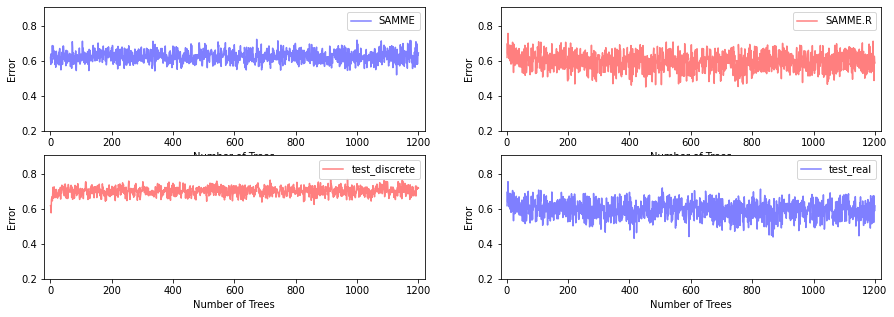

In [ ]:
# atrain = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals, y_train)
# atest = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals2, y_test)
atrain = SelectKBest(f_classif, k = 1000).fit_transform(featureVals, y_train)
atest = SelectKBest(f_classif, k = 1000).fit_transform(featureVals2, y_test)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1200,
    learning_rate=1)
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1200,
    learning_rate=1.5,
    algorithm="SAMME")


bdt_real.fit(atrain, y_train)
n_trees_real = len(bdt_real)
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
print(accuracy_score(bdt_real.predict(atest),y_test))



bdt_discrete.fit(atrain, y_train)



n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


bdt_real_test = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=1200,
    learning_rate=1)
bdt_real_test.fit(atrain, y_train)

bdt_discrete_test =AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=1200,
    learning_rate=1,
    algorithm='SAMME')
bdt_discrete_test.fit(atrain, y_train)


discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
test_real_errors=bdt_real_test.estimator_errors_[:]
test_discrete_errors=bdt_discrete_test.estimator_errors_[:]

plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(222)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5,color='r')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(224)
plt.plot(range(1, n_trees_real + 1), test_real_errors,
         "r", label='test_real', alpha=.5, color='b')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(223)
plt.plot(range(1, n_trees_real + 1), test_discrete_errors,
         "r", label='test_discrete', alpha=.5)

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


from sklearn.metrics import accuracy_score

print(accuracy_score(bdt_real.predict(atest),y_test))
print(accuracy_score(bdt_real_test.predict(atest),y_test))
print(accuracy_score(bdt_discrete.predict(atest),y_test))
print(accuracy_score(bdt_discrete_test.predict(atest),y_test))

In [ ]:
atrain = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals, y_train)
atest = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals2, y_test)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")


bdt_real.fit(atrain, btrain)
n_trees_real = len(bdt_real)
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
print(accuracy_score(bdt_real.predict(atest),btest))



bdt_discrete.fit(atrain, btrain)



n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


bdt_real_test = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_real_test.fit(atrain, btrain)

bdt_discrete_test =AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1,
    algorithm='SAMME')
bdt_discrete_test.fit(atrain, btrain)


discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
test_real_errors=bdt_real_test.estimator_errors_[:]
test_discrete_errors=bdt_discrete_test.estimator_errors_[:]

plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(222)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5,color='r')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(224)
plt.plot(range(1, n_trees_real + 1), test_real_errors,
         "r", label='test_real', alpha=.5, color='b')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(223)
plt.plot(range(1, n_trees_real + 1), test_discrete_errors,
         "r", label='test_discrete', alpha=.5)

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


from sklearn.metrics import accuracy_score

print(accuracy_score(bdt_real.predict(atest),btest))
print(accuracy_score(bdt_real_test.predict(atest),btest))
print(accuracy_score(bdt_discrete.predict(atest),btest))
print(accuracy_score(bdt_discrete_test.predict(atest),btest))

ValueError: ignored

In [ ]:
atrain = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals, y_train)
atest = SelectPercentile(f_classif, percentile=6).fit_transform(featureVals2, y_test)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=600,
    learning_rate=1)
atrain = atrain[600:]
atest = atest[200:]
btrain = y_train[600:]
btest = y_test[200:]

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")


bdt_real.fit(atrain, btrain)
n_trees_real = len(bdt_real)
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
print(accuracy_score(bdt_real.predict(atest),btest))



bdt_discrete.fit(atrain, btrain)



n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


bdt_real_test = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=600,
    learning_rate=1)
bdt_real_test.fit(atrain, btrain)

bdt_discrete_test =AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=600,
    learning_rate=1,
    algorithm='SAMME')
bdt_discrete_test.fit(atrain, btrain)


discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
test_real_errors=bdt_real_test.estimator_errors_[:]
test_discrete_errors=bdt_discrete_test.estimator_errors_[:]

plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(222)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5,color='r')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(224)
plt.plot(range(1, n_trees_real + 1), test_real_errors,
         "r", label='test_real', alpha=.5, color='b')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(223)
plt.plot(range(1, n_trees_real + 1), test_discrete_errors,
         "r", label='test_discrete', alpha=.5)

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


from sklearn.metrics import accuracy_score

print(accuracy_score(bdt_real.predict(atest),btest))
print(accuracy_score(bdt_real_test.predict(atest),btest))
print(accuracy_score(bdt_discrete.predict(atest),btest))
print(accuracy_score(bdt_discrete_test.predict(atest),btest))

0.37254901960784315
0.40522875816993464
0.3333333333333333
0.3333333333333333


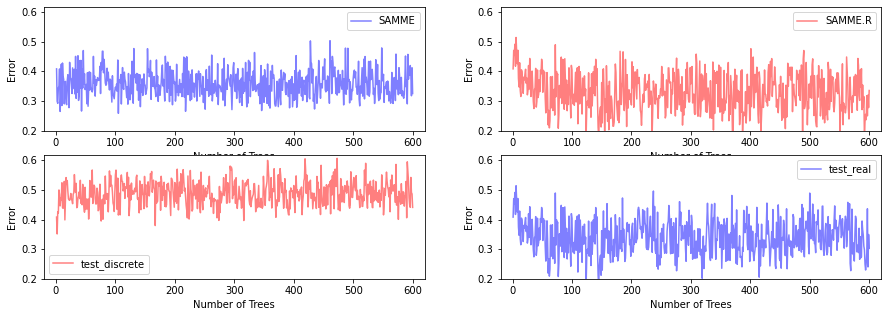

In [ ]:
iis2 =  []
for i in range(len(X_test)):
  iis2.append(cv2.integral(X_test[i]))
features2 = buildFeatures(iis2[0].shape)
featureVals2 = applyFeatures(features2, iis2)
featureVals2 = featureVals2.T
atrain = SelectKBest(f_classif, k = 1000).fit_transform(featureVals, y_train)
atest = SelectKBest(f_classif, k = 1000).fit_transform(featureVals2, y_test)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
atrain = atrain[450:]
atest = atest[150:]
btrain = y_train[450:]
btest = y_test[150:]

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")


bdt_real.fit(atrain, btrain)
n_trees_real = len(bdt_real)
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]



bdt_discrete.fit(atrain, btrain)



n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


bdt_real_test = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_real_test.fit(atrain, btrain)

bdt_discrete_test =AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1,
    algorithm='SAMME')
bdt_discrete_test.fit(atrain, btrain)


discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
test_real_errors=bdt_real_test.estimator_errors_[:]
test_discrete_errors=bdt_discrete_test.estimator_errors_[:]

plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(222)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5,color='r')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(224)
plt.plot(range(1, n_trees_real + 1), test_real_errors,
         "r", label='test_real', alpha=.5, color='b')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(223)
plt.plot(range(1, n_trees_real + 1), test_discrete_errors,
         "r", label='test_discrete', alpha=.5)

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


from sklearn.metrics import accuracy_score

print(accuracy_score(bdt_real.predict(atest),btest))
print(accuracy_score(bdt_real_test.predict(atest),btest))
print(accuracy_score(bdt_discrete.predict(atest),btest))
print(accuracy_score(bdt_discrete_test.predict(atest),btest))

0.49514563106796117
0.49514563106796117
0.5728155339805825
0.5339805825242718


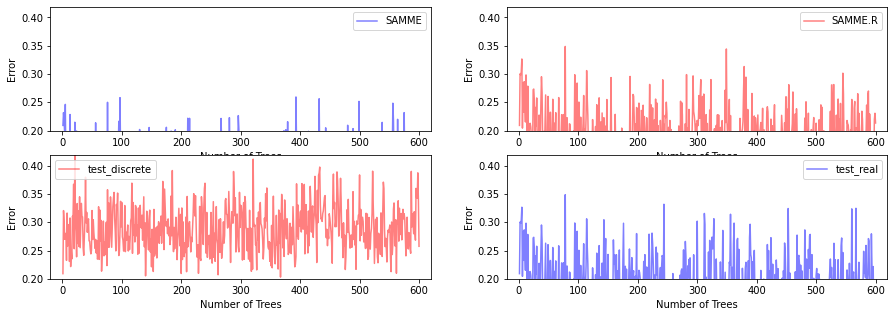

In [ ]:
atrain = SelectKBest(f_classif, k = 1000).fit_transform(featureVals, y_train)
atest = SelectKBest(f_classif, k = 1000).fit_transform(featureVals2, y_test)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
atrain = atrain[600:]
atest = atest[200:]
btrain = y_train[600:]
btest = y_test[200:]

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")


bdt_real.fit(atrain, btrain)
n_trees_real = len(bdt_real)
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]



bdt_discrete.fit(atrain, btrain)



n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


bdt_real_test = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_real_test.fit(atrain, btrain)

bdt_discrete_test =AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1,
    algorithm='SAMME')
bdt_discrete_test.fit(atrain, btrain)


discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
test_real_errors=bdt_real_test.estimator_errors_[:]
test_discrete_errors=bdt_discrete_test.estimator_errors_[:]

plt.figure(figsize=(15, 5))
plt.subplot(221)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(222)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5,color='r')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(224)
plt.plot(range(1, n_trees_real + 1), test_real_errors,
         "r", label='test_real', alpha=.5, color='b')

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(223)
plt.plot(range(1, n_trees_real + 1), test_discrete_errors,
         "r", label='test_discrete', alpha=.5)

plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


from sklearn.metrics import accuracy_score

print(accuracy_score(bdt_real.predict(atest),btest))
print(accuracy_score(bdt_real_test.predict(atest),btest))
print(accuracy_score(bdt_discrete.predict(atest),btest))
print(accuracy_score(bdt_discrete_test.predict(atest),btest))